In [1]:
!pip install -q slycot control
from control import matlab
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
print("28E24013の大木啓輔です")

28E24013の大木啓輔です


制御対象を準備
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


3.736e+06 s^4 + 2.271e+05 s^3 + 2.261e+09 s^2 + 2.873e+07 s + 3.315e+10
-----------------------------------------------------------------------
  8873 s^6 + 4061 s^5 + 1.051e+07 s^4 + 2.309e+06 s^3 + 1.642e+09 s^2

極を確認
以下に制御対象のボード線図を示す


(1, 1000)

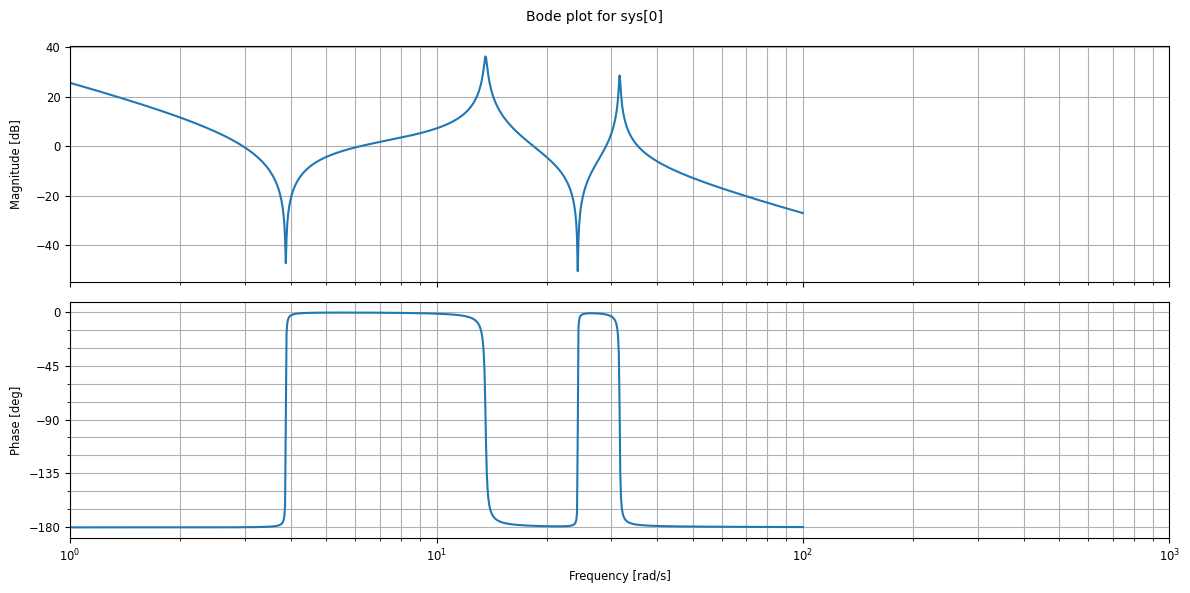

In [3]:
print("制御対象を準備")
num = [3.736e+6, 2.271e+5, 2.261e+9, 2.873e+7, 3.315e+10] #分子の係数
dem = [8873,4061,1.051e+7,2.309e+6,1.642e+9,0,0] #分母の係数
P_0 = matlab.tf(num,dem) #分数にしてP_0を作る
print(P_0) #P_0を出力

print("極を確認")
matlab.pole(P_0) #極を確認

print("以下に制御対象のボード線図を示す")
fig = plt.figure(figsize = (12, 6)) #12×6のfigureを作成
mag, phase, omega = matlab.bode(P_0, Hz=False) #figureにボード線図を描画
plt.xlim(1, 1000) # x軸の範囲を1から1000に設定

PI補償器を準備
以下にPI補償器の伝達関数を出力する
<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1000 s + 0.5
------------
     s

フィードバック系を構成
以下にフィードバック系を出力する
<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


           3.736e+09 s^5 + 2.29e+08 s^4 + 2.261e+12 s^3 + 2.986e+10 s^2 + 3.315e+13 s + 1.658e+10
-------------------------------------------------------------------------------------------------------------
8873 s^7 + 4061 s^6 + 3.747e+09 s^5 + 2.313e+08 s^4 + 2.263e+12 s^3 + 2.986e+10 s^2 + 3.315e+13 s + 1.658e+10

極を確認
[-0.19822415+649.33218134j -0.19822415-649.33218134j
 -0.02448648 +24.28482153j -0.02448648 -24.28482153j
 -0.00587967  +3.87618005j -0.00587967  -3.87618005j
 -0.0005      +0.j        ]
以下にPI補償器のボード線図を示す


(1, 1000)

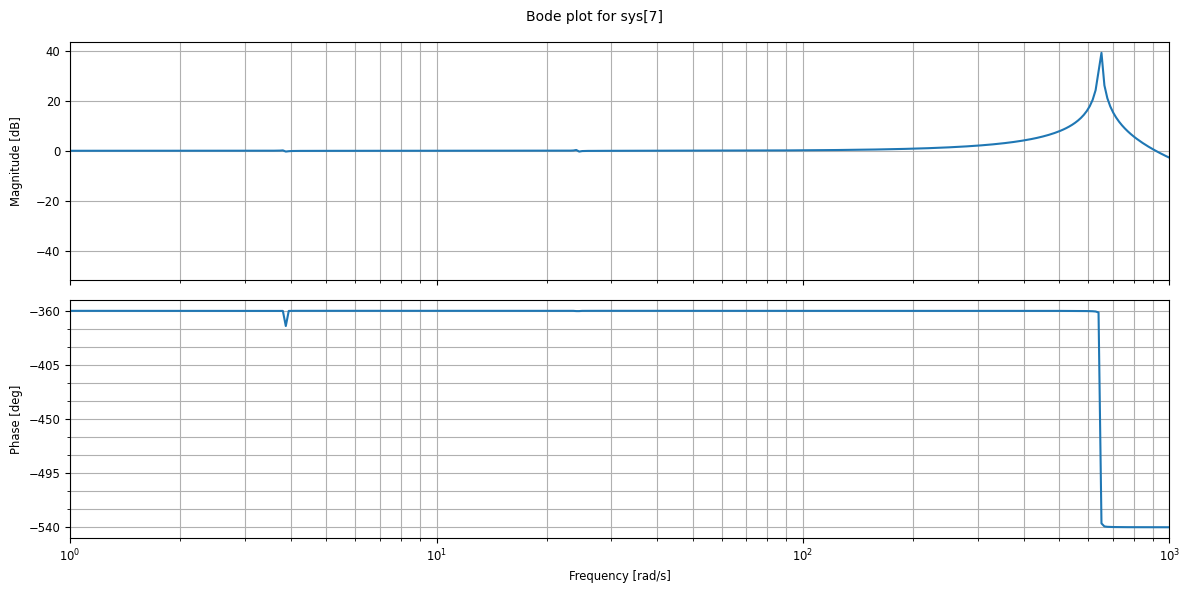

In [4]:
print("PI補償器を準備")

P = 1e+3 #PI補償器の係数

K_i = 5e-1 #I補償器の分子の係数
I_num = [K_i] #Iの補償器の分子
I_dem = [1,0] #Iの補償器の分母
I = matlab.tf(I_num,I_dem) #I補償器

PI = P + I

print("以下にPI補償器の伝達関数を出力する")
print(PI) #PIの補償器の伝達関数を出力

print("フィードバック系を構成")
print("以下にフィードバック系を出力する")
sys_1= matlab.feedback(P_0*PI,1,-1) #フィードバック系を構成
print(sys_1) #フィードバック系を出力

fig = plt.figure(figsize = (12, 6)) #12×6のfigureを作成

print("極を確認")
print(matlab.pole(sys_1)) #極を確認

print("以下にPI補償器のボード線図を示す")
mag, phase, omega = matlab.bode(sys_1, Hz=False) #figureにボード線図を描画
plt.xlim(1, 1000) # x軸の範囲を1から1000に設定

ステップ応答を計算
以下にステップ応答を計算した結果を示す


C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  func(*args, **kwargs)
C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  func(*args, **kwargs)
C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from current font.
  func(*args, **kwargs)
C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20767 (\N{CJK UNIFIED IDEOGRAPH-511F}) missing from current font.
  func(*args, **kwargs)
C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22120 (\N{CJK UNIFIED IDEOGRAPH-5668}) missing from current font.
  func(*args, **kwargs)
C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDE

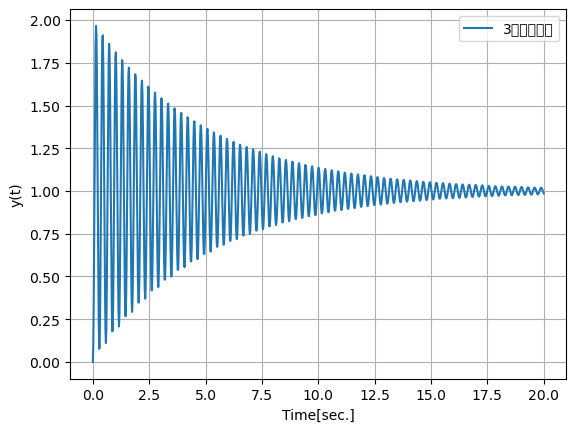

In [5]:
print("ステップ応答を計算")
time= 20 #時間間隔は20
t = np.linspace(0,time,1000) #0～1000まで20間隔で羅列されたベクトルを作成
#制御対象に対して与えられた時間ベクトル t に基づいてステップ応答を計算し，その結果を y1 と T1 に格納することを意味する．
#具体的には，t ベクトルで指定された時間の各時点におけるステップ入力に対する制御対象の応答を計算し，その応答の時間変化を表す信号を y1 に，対応する時間ベクトルを T1 に格納する．
y1,T1 = matlab.step(sys_1,t)

print("以下にステップ応答を計算した結果を示す")
#ステップ応答の時間変化を示すグラフを作成し，その際に横軸に時間，縦軸に応答の値を配置する．T1は時間ベクトルであり，y1は対応する応答の値を表す．
#具体的には，T1に沿って時間が進行するときの，y1の値をグラフ上にプロットします．
plt.plot(T1, y1, label = "3次の補償器")
plt.xlabel("Time[sec.]")
plt.ylabel("y(t)")
plt.grid()
plt.legend()

ステップ応答にノイズを入れてみる
ノイズ信号を生成する


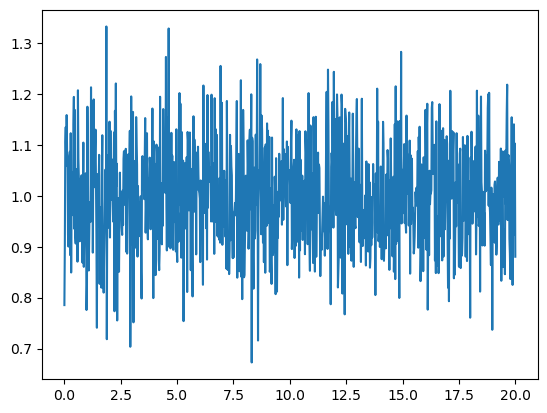

In [6]:
print("ステップ応答にノイズを入れてみる")
print("ノイズ信号を生成する")
noize = np.random.normal(loc=0, scale=0.1, size=len(t)) #中心=0，scale=0.1，size=t(時間)のベクトルを作成
u = 1 + noize #noizeベクトルに1を足したものをuとする
plt.plot(t,u) #時間=t(横軸)，noize=u(縦軸)のグラフを出力

シミュレーションして結果を表示


C:\Users\o_kei\OneDrive\Lib\site-packages\control\timeresp.py:1003: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


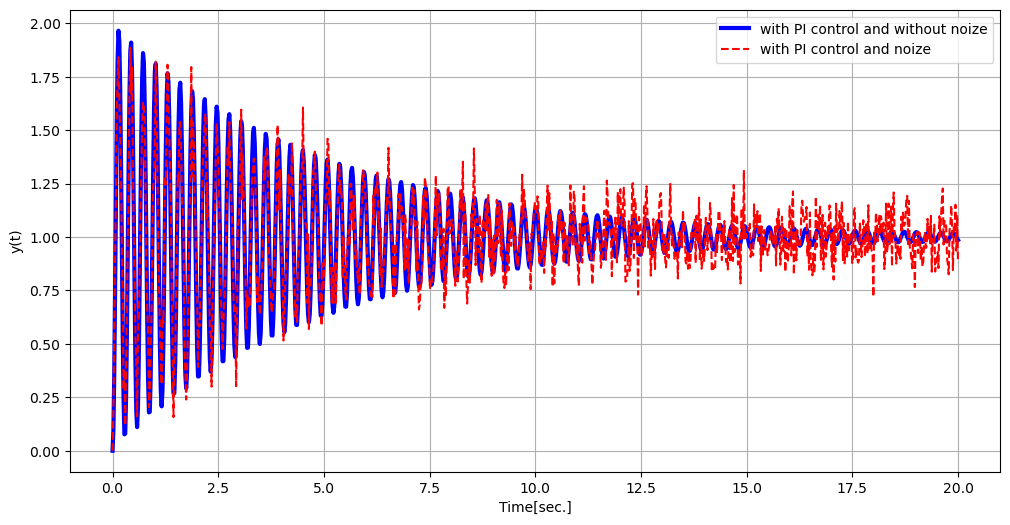

In [7]:
print("シミュレーションして結果を表示")
fig = plt.figure(figsize = (12, 6))

[y2, T2, x2] = matlab.lsim(sys_1, U=u, T=t)
[y3, T3, x3] = matlab.lsim(P_0/(1 + P_0), U=u, T=t)

plt.plot(T1, y1, label = "with PI control and without noize", color="blue", linewidth=3)
plt.plot(T2, y2, label = "with PI control and noize", color="red", linestyle = "dashed")


plt.xlabel("Time[sec.]")
plt.ylabel("y(t)")
plt.grid()
plt.legend()

In [8]:
# 3次の補償器を準備
print("forループで3次の補償器のそれぞれの次数の係数を求める")
a_3 = 1
a_3_values = [a_3]
a_2_values = [1, 10, 100, 1000]
a_1_values = [1, 10, 100, 1000]
a_0_values = [1, 10, 100, 1000]
b_3_values = [0]  # b_3 は0
b_2_values = [-1000, -100, -10, -1, 1, 10, 100, 1000]
b_1_values = [-1000, -100, -10, -1, 1, 10, 100, 1000]
b_0_values = [-1000, -100, -10, -1, 1, 10, 100, 1000]

for a_2 in a_2_values:
    for a_1 in a_1_values:
        for a_0 in a_0_values:
            for b_2 in b_2_values:
                for b_1 in b_1_values:
                    for b_0 in b_0_values:
                        hoshoki_num = [b_2, b_1, b_0]
                        hoshoki_dem = [a_3, a_2, a_1, a_0]
                        hoshoki = matlab.tf(hoshoki_num, hoshoki_dem)
                        sys_2 = matlab.feedback(P_0 * hoshoki, 1, -1)
                        poles = matlab.pole(sys_2)
                        if all(np.real(pole) < 0 for pole in poles):
                            print("Found stabilizing parameters:")
                            print("a_2 =", a_2)
                            print("a_1 =", a_1)
                            print("a_0 =", a_0)
                            print("b_2 =", b_2)
                            print("b_1 =", b_1)
                            print("b_0 =", b_0)
                            break
                    else:
                        continue
                    break
                else:
                    continue
                break
            else:
                continue
            break
        else:
            continue
        break
    else:
        continue
    break

forループで3次の補償器のそれぞれの次数の係数を求める
Found stabilizing parameters:
a_2 = 10
a_1 = 10
a_0 = 100
b_2 = -1
b_1 = 1
b_0 = 1


3次の補償器を準備
以下に3次の補償器の伝達関数を出力する
<TransferFunction>: sys[45990]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      -s^2 + s + 1
-------------------------
s^3 + 10 s^2 + 10 s + 100

フィードバック系を構成
以下にフィードバック系を出力する
<TransferFunction>: sys[45993]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                     -3.736e+06 s^6 + 3.509e+06 s^5 - 2.257e+09 s^4 + 2.232e+09 s^3 - 3.086e+10 s^2 + 3.318e+10 s + 3.315e+10
--------------------------------------------------------------------------------------------------------------------------------------------------
8873 s^9 + 9.279e+04 s^8 + 1.064e+07 s^7 + 1.046e+08 s^6 + 1.774e+09 s^5 + 1.524e+10 s^4 + 1.888e+10 s^3 + 1.333e+11 s^2 + 3.318e+10 s + 3.315e+10

極を確認
[-2.15623214e-01+31.57591197j -2.15623214e-01-31.57591197j
 -4.78398123e-01+13.31793499j -4.78398123e-01-13.31793499j
 -8.83748622e+00 +0.j         -3.40148816e-05 +3.01191601j
 -3.40148816e-05 -3.01191601j -1.16041838e-01 +0.49970199j
 -1.16041838e-01 -0.49970199j]
以下に3次の補償器のボード線図を示す


(1, 1000)

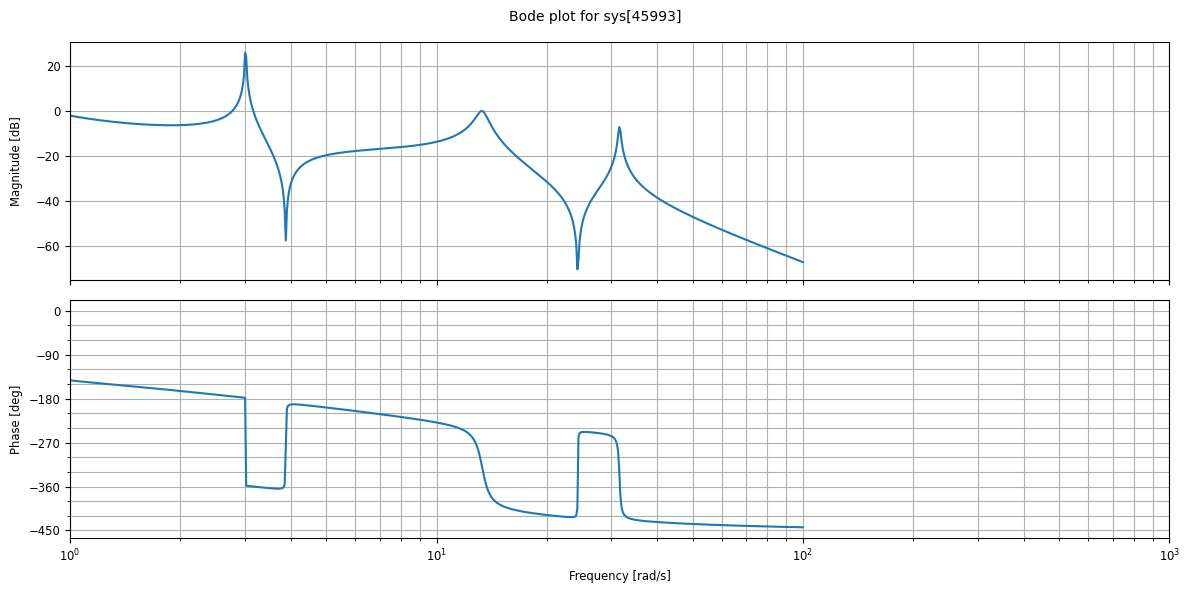

In [9]:
print("3次の補償器を準備")

hoshoki_num = [b_2,b_1,b_0] #3次の補償器の分子
hoshoki_dem = [a_3,a_2,a_1,a_0] #3次の補償器の分母
hoshoki = matlab.tf(hoshoki_num,hoshoki_dem) #3次の補償器


print("以下に3次の補償器の伝達関数を出力する")
print(hoshoki) #3次の補償器の伝達関数を出力

print("フィードバック系を構成")
print("以下にフィードバック系を出力する")
sys_2 = matlab.feedback(P_0*hoshoki,1,-1) #フィードバック系を構成
print(sys_2) #フィードバック系を出力

fig = plt.figure(figsize = (12, 6)) #12×6のfigureを作成

print("極を確認")
print(matlab.pole(sys_2)) #極を確認

print("以下に3次の補償器のボード線図を示す")
mag, phase, omega = matlab.bode(sys_2, Hz=False) #figureにボード線図を描画
plt.xlim(1, 1000) # x軸の範囲を1から1000に設定

ステップ応答を計算
以下にステップ応答を計算した結果を示す


C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  func(*args, **kwargs)
C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  func(*args, **kwargs)
C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from current font.
  func(*args, **kwargs)
C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20767 (\N{CJK UNIFIED IDEOGRAPH-511F}) missing from current font.
  func(*args, **kwargs)
C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22120 (\N{CJK UNIFIED IDEOGRAPH-5668}) missing from current font.
  func(*args, **kwargs)
C:\Users\o_kei\OneDrive\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDE

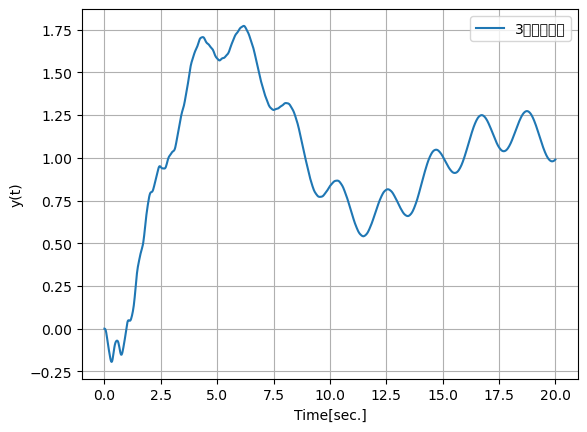

In [10]:
print("ステップ応答を計算")
time= 20 #時間間隔は20
t = np.linspace(0,time,1000) #0～1000まで20間隔で羅列されたベクトルを作成
#制御対象に対して与えられた時間ベクトル t に基づいてステップ応答を計算し，その結果を y1 と T1 に格納することを意味する．
#具体的には，t ベクトルで指定された時間の各時点におけるステップ入力に対する制御対象の応答を計算し，その応答の時間変化を表す信号を y1 に，対応する時間ベクトルを T1 に格納する．
y1,T1 = matlab.step(sys_2,t)

print("以下にステップ応答を計算した結果を示す")
#ステップ応答の時間変化を示すグラフを作成し，その際に横軸に時間，縦軸に応答の値を配置する．T1は時間ベクトルであり，y1は対応する応答の値を表す．
#具体的には，T1に沿って時間が進行するときの，y1の値をグラフ上にプロットします．
plt.plot(T1, y1, label = "3次の補償器")
plt.xlabel("Time[sec.]")
plt.ylabel("y(t)")
plt.grid()
plt.legend()

C:\Users\o_kei\OneDrive\Lib\site-packages\control\timeresp.py:1003: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


シミュレーションして結果を表示


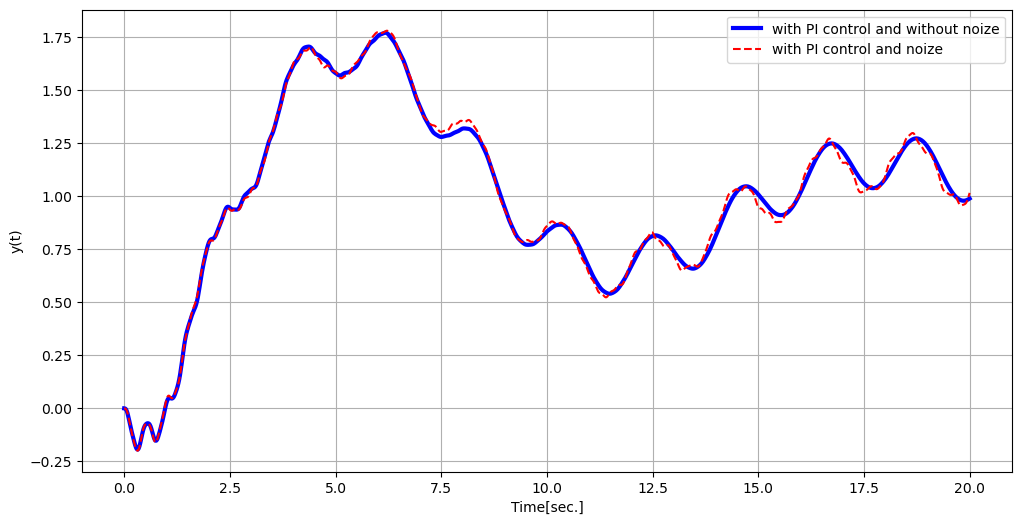

In [11]:
print("シミュレーションして結果を表示")
fig = plt.figure(figsize = (12, 6))

[y2, T2, x2] = matlab.lsim(sys_2, U=u, T=t)
[y3, T3, x3] = matlab.lsim(P_0/(1 + P_0), U=u, T=t)

plt.plot(T1, y1, label = "with PI control and without noize", color="blue", linewidth=3)
plt.plot(T2, y2, label = "with PI control and noize", color="red", linestyle = "dashed")


plt.xlabel("Time[sec.]")
plt.ylabel("y(t)")
plt.grid()
plt.legend()